In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nameofthisround = 'sept2016_allrp_newdf_3'

model             = os.getcwd()
data              = model+'/data/'

#load codes
codes = pd.read_csv('wbccodes2014.csv')

#storage of results
without_disasters = "{}/without_disasters_{}/".format(model,nameofthisround)

In [3]:
list_results=os.listdir(without_disasters)

In [4]:
len(list_results)

117

In [5]:
all_results = pd.DataFrame()
for file in list_results:
    country_result = pd.read_csv(without_disasters+file)
    country_result = country_result.drop([s for s in country_result.columns if "Unnamed" in s],axis=1)
    all_results = all_results.append(country_result,ignore_index=True)

In [6]:
all_results.countrycode.replace(codes.set_index('country')['country_name']).unique();

In [7]:
all_results.hazard_name.unique()

array(['drought', 'earthquake', 'flood', 'floodglofris', 'tsunami',
       'surge', 'wind'], dtype=object)

In [8]:
all_results['avoided_poor']=all_results.extrpoor_bau-all_results.extrpoor
all_results['avoided_poor_pc']=all_results.avoided_poor/all_results.extrpoor_bau

In [9]:
all_results['gap_diff']=all_results.gapextrpoor_bau-all_results.gapextrpoor

In [10]:
all_results.columns;

In [11]:
all_results.sample(10)

,countrycode,disasters_cursor,hazard_name,rp,GDP,avincome,incbott10,incbott20,inc2040,incbott40,...,peoplenonag_bau,incsharebott20ag_bau,incsharebott20nonag_bau,poorag_bau,poornonag_bau,avincomeag_bau,avincomenonag_bau,avoided_poor,avoided_poor_pc,gap_diff
15035,VNM,1.0,floodglofris,250,2.463748e+10,272.732734,62.824120,82.447699,143.417126,112.932412,...,85375190,0.081326,0.063139,269985,1747197,170.714309,256.567858,526479.080054,0.260997,5.883500e-04
1189,BGD,0.5,tsunami,250,1.326452e+10,85.435657,28.794762,35.247980,52.405790,43.826885,...,141212554,0.078813,0.087879,3916531,56483711,101.057998,83.881868,0.000000,0.000000,0.000000e+00
8381,LKA,0.0,tsunami,30000,4.798957e+09,234.992190,60.370457,76.813578,122.953229,99.883404,...,15297302,0.083104,0.069098,131445,103651,162.106448,251.075103,12774.744788,0.054338,7.426526e-05
13316,SWZ,0.5,earthquake,5,1.920174e+08,155.883054,10.859189,17.599084,40.736561,29.167822,...,1150809,0.043890,0.022805,37974,472176,105.558243,159.339019,212.147719,0.000416,1.211699e-04
1807,BTN,0.0,flood,50,2.142989e+08,288.122556,63.049231,82.298073,143.281633,112.789853,...,322563,0.081218,0.071842,6934,854,177.635131,402.994032,658.305637,0.084528,1.453563e-04
11333,PAN,0.5,flood,20,2.101268e+09,561.261916,54.423467,90.279160,211.522432,150.900796,...,3161501,0.039347,0.042730,95107,41365,235.532447,620.344133,230.279169,0.001687,1.369339e-05
13116,SVN,0.5,earthquake,4000,2.390460e+09,1158.782788,409.789610,524.668419,836.782068,680.725244,...,2017924,0.104295,0.095816,0,0,850.382204,1006.381592,0.000000,NaN,0.000000e+00
1802,BTN,0.0,earthquake,5000,2.388544e+08,321.137143,69.019130,89.441244,157.635140,123.538192,...,322563,0.081218,0.071842,6934,854,177.635131,402.994032,2362.476425,0.303348,5.216433e-04
2376,CHL,1.0,flood,3,1.158545e+10,666.256347,87.494498,125.060566,240.585483,182.823025,...,15806419,0.056545,0.038276,984,26678,475.007718,685.396141,1.061539,0.000038,1.667845e-08
11383,PAN,1.0,earthquake,100,2.138634e+09,571.242633,54.979549,91.009398,213.278264,152.143831,...,3161501,0.039347,0.042730,95107,41365,235.532447,620.344133,2583.485843,0.018931,1.578305e-04


In [12]:
all_results.drop_duplicates('countrycode')[['tot_pop','extrpoor_bau']].sum()/1e6

tot_pop         6051.428243
extrpoor_bau     782.347444
dtype: float64

In [13]:
def average_over_rp(df):        
    ###AGGREGATION OF THE OUTPUTS OVER RETURN PERIODS
    
    #does nothing if df does not contain data on return periods
    try:
        if "rp" not in df.index.names:
            print("rp was not in df")
            return df
    except(TypeError):
        pass
    
    #just drops rp index if df contains default_rp
    # if default_rp in df.index.get_level_values("rp"):
        # print("default_rp detected, droping rp")
        # return df.reset_index("rp",drop=True)
        
    df=df.copy().reset_index("rp")

    #computes probability of each return period
    return_periods=np.unique(df["rp"].dropna())

    proba = pd.Series(np.diff(np.append(1/return_periods,0)[::-1])[::-1],index=return_periods) #removes 0 from the rps

    #matches return periods and their probability
    proba_serie=df["rp"].replace(proba)


    #handles cases with multi index and single index (works around pandas limitation)
    idxlevels = list(range(df.index.nlevels))
    if idxlevels==[0]:
        idxlevels =0
        
    #average weighted by proba
    averaged = df.mul(proba_serie,axis=0).sum(level=idxlevels) # obsolete .div(proba_serie.sum(level=idxlevels),axis=0)
    
    return averaged.drop("rp",axis=1)

In [14]:
all_results = all_results.drop_duplicates(['countrycode','disasters_cursor','hazard_name','rp'])

In [15]:
from pandas_helper import *

In [16]:
recovery = pd.read_csv("data/disasters/N.csv",dtype='float')

In [17]:
df = all_results.set_index(['countrycode','disasters_cursor','hazard_name','rp'])\
[['avoided_poor','avoided_poor_pc','gap_diff']].copy()
df.columns.name="var"

In [18]:
N = broadcast_simple(recovery.set_index(["disasters_cursor","rp"]),df.index)
N.sample(4)

disasters_cursor  rp   countrycode  hazard_name
0.5               50   DJI          flood          2
1.0               250  EST          flood          5
                  1    BRA          surge          3
0.0               100  HUN          earthquake     2
Name: N, dtype: float64

In [19]:
df['N'] = N.swaplevel(i="countrycode", j="disasters_cursor").swaplevel(i="rp", j="disasters_cursor").swaplevel(i="rp", j="hazard_name")
df.N=df.N.fillna(method="ffill").fillna(method="bfill")

In [20]:
for x in df.columns:
    df[x+"_time"] = df[x]*df.N/2

In [21]:
hop=df.stack().unstack("rp").fillna(method='ffill',axis=1)
#hop[0]=0

In [29]:
df.drop(["gap_diff","gap_diff_time","N_time"],axis=1).to_csv("all_results_jan31_2017.csv")

In [22]:
tak=hop.stack().unstack("hazard_name").unstack("rp").copy()

# droughts

In [23]:
paf = pd.DataFrame()
for hazard_name in ['drought']:

    temp = tak[hazard_name].copy()

    b = temp[25]-(temp[25]-temp[5])/(25-5)*25
    temp[2]=b+(temp[25]-temp[5])/(25-5)*2
    temp[2]=temp[2].clip(lower=0)

    temp2 = average_over_rp(temp.unstack().stack("rp") )
    temp2['hazard_name'] = 'drought'
    
    paf = paf.append(temp2)

# flood glofris

In [24]:
for hazard_name in ['floodglofris']:

    temp = tak[hazard_name].copy()

    b = temp[10]-(temp[10]-temp[5])/(10-5)*10
    temp[2]=b+(temp[10]-temp[5])/(10-5)*2
    temp[2]=temp[2].clip(lower=0)

    temp2 = average_over_rp(temp.unstack().stack("rp"))
    temp2['hazard_name'] = 'floodglofris'
    
    paf = paf.append(temp2)

# all other hazards

In [25]:
for hazard in ['earthquake', 'surge','tsunami', 'wind','flood']:
    temp = tak[hazard].copy()

    temp2 = average_over_rp(temp.unstack().stack("rp"))
    temp2['hazard_name'] = hazard
    paf = paf.append(temp2)

In [28]:
paf[['avoided_poor_time','avoided_poor_pc_time']].to_csv("results_unbreakable.csv")

In [26]:
totals = paf.reset_index().set_index(["countrycode","disasters_cursor","hazard_name"]).avoided_poor_time.sum(level=['disasters_cursor','hazard_name'])

In [27]:
paf.columns

Index(['avoided_poor', 'avoided_poor_pc', 'gap_diff', 'N', 'avoided_poor_time',
       'avoided_poor_pc_time', 'gap_diff_time', 'N_time', 'hazard_name'],
      dtype='object', name='var')

In [28]:
paf.drop([0,1],level="disasters_cursor").avoided_poor_pc_time.sum(level="countrycode").dropna().to_csv("country_impact_median.csv")

In [29]:
totals2 = paf.reset_index().set_index(["countrycode","disasters_cursor","hazard_name"]).gap_diff_time.sum(level=['disasters_cursor','hazard_name'])

In [30]:
by_impact = totals.unstack("hazard_name")
by_impact2 = totals2.unstack("hazard_name")

In [31]:
by_impact*10**(-6)

hazard_name,drought,earthquake,flood,floodglofris,surge,tsunami,wind
disasters_cursor,,,,,,,
0.0,1.797804,0.137737,0.628334,2.666499,0.041093,0.004749,0.101992
0.5,13.232152,0.412038,1.881465,8.258886,0.152675,0.014048,0.351808
1.0,34.130726,1.169653,4.977310,40.842203,0.585313,0.041971,1.100317


In [32]:
by_impact2*10**(-6)

hazard_name,drought,earthquake,flood,floodglofris,surge,tsunami,wind
disasters_cursor,,,,,,,
0.0,8.339696e-09,2.116610e-09,4.003264e-09,6.707878e-09,2.651427e-10,1.244859e-11,1.096141e-09
0.5,7.805732e-08,6.357521e-09,1.270583e-08,2.266059e-08,9.326441e-10,3.618730e-11,4.026166e-09
1.0,2.560896e-07,1.815629e-08,3.146415e-08,1.168307e-07,2.822710e-09,1.032902e-10,1.228143e-08


In [23]:
%matplotlib inline

In [23]:
def spine_and_ticks(ax,reverted=False, thousands=False):
    
    if reverted:
    
        ax.spines['top'].set_color('none')
        ax.spines['left'].set_color("none")

        #removes ticks 
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('right')
        
    else:
        
            ax.spines['top'].set_color('none')
            ax.spines['right'].set_color("none")

            #removes ticks 
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
        
    if thousands:
        ax.get_xaxis().set_major_formatter(funfor(lambda x, p: format(int(x), ',')))
        ax.get_yaxis().set_major_formatter(funfor(lambda x, p: format(int(x), ',')))

In [24]:
from itertools import cycle, islice
from matplotlib.ticker import FuncFormatter as funfor

In [25]:
def y_thousands_sep(ax=None):
    if ax is None:
        ax=plt.gca()
    ax.get_yaxis().set_major_formatter(funfor(lambda x, p: format(int(x), ',')))
    plt.tight_layout()

In [26]:
def savefig(path, **kwargs):
    #Saves in both png and pdf
    
    plt.tight_layout()
    
    path = path.replace(".png","")
    path = path.replace(".pdf","")

    plt.savefig(path+".png", )
    plt.savefig(path+".pdf", )

In [38]:
to_plot = totals.drop(["flood","floodglofris","drought"],level="hazard_name").unstack("disasters_cursor")[0.5]

In [39]:
to_plot

hazard_name
earthquake    412037.613957
surge         152674.724711
tsunami        14048.472708
wind          351808.460698
Name: 0.5, dtype: float64

C:\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:2651: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


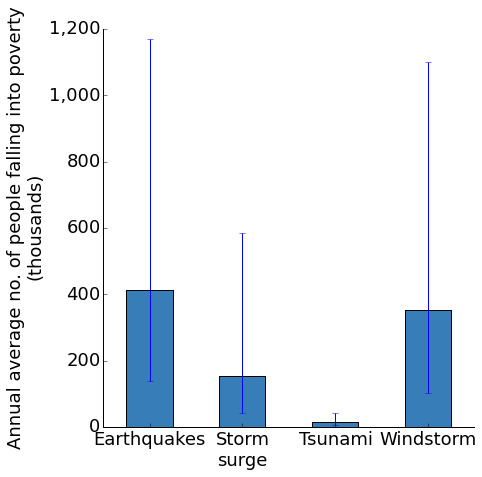

In [42]:
font = {'family' : 'sans serif',
    'size'   : 18}
plt.rc('font', **font)

fig1 = plt.figure(figsize=(7,7))
ax = fig1.add_subplot(111)
f = 10**(-3)*totals.drop(["flood","floodglofris","drought"],level="hazard_name").unstack("disasters_cursor")

error_bars = [f[0.5].values-f[0].values,f[1].values-f[0.5].values]
to_plot = f[0.5]

my_colors = ['#377eb8']

to_plot.plot(kind='bar',rot=0,ax=ax,color=my_colors,legend=False)
plt.errorbar(ax.get_xticks(), to_plot.values, yerr=error_bars,fmt=None,color='black')
#ax.legend(frameon=False,loc=0,title="Impact of disasters",prop=font)
plt.ylabel("Annual average no. of people falling into poverty\n(thousands)")
plt.xlabel("")
labels = [item.get_text().title() for item in ax.get_xticklabels()]
labels[0] = "Earthquakes"
labels[1] = "Storm\nsurge"
labels[2] = "Tsunami"
labels[3] = "Windstorm"
ax.set_xticklabels(labels)
spine_and_ticks(ax)
y_thousands_sep(ax)
#savefig("results_other_disasters_newdf_with_reconstruction_onlymedium.png",bbox_inches="tight",dpi=300)

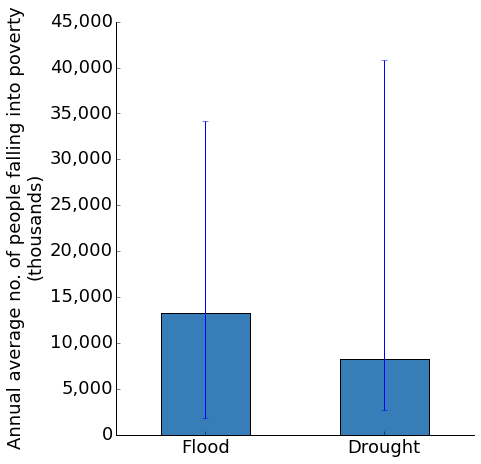

In [43]:
font = {'family' : 'sans serif',
    'size'   : 18}
plt.rc('font', **font)

fig1 = plt.figure(figsize=(7,7))
ax = fig1.add_subplot(111)
f = 10**(-3)*totals.drop(['earthquake','surge','tsunami','wind','flood'],level="hazard_name").unstack("disasters_cursor")

error_bars = [f[0.5].values-f[0].values,f[1].values-f[0.5].values]
to_plot = f[0.5]

my_colors = ['#377eb8']

to_plot.plot(kind='bar',rot=0,ax=ax,color=my_colors,legend=False)
plt.errorbar(ax.get_xticks(), to_plot.values, yerr=error_bars,fmt=None,color='black')
#ax.legend(frameon=False,loc=0,title="Impact of disasters",prop=font)
plt.ylabel("Annual average no. of people falling into poverty\n(thousands)")
plt.xlabel("")
labels = [item.get_text().title() for item in ax.get_xticklabels()]
labels[0] = "Flood"
labels[1] = "Drought"

ax.set_xticklabels(labels)
spine_and_ticks(ax)
y_thousands_sep(ax)
#savefig("results_drought_floods_newdf_with_reconstruction_onlymedium.png",bbox_inches="tight",dpi=300)

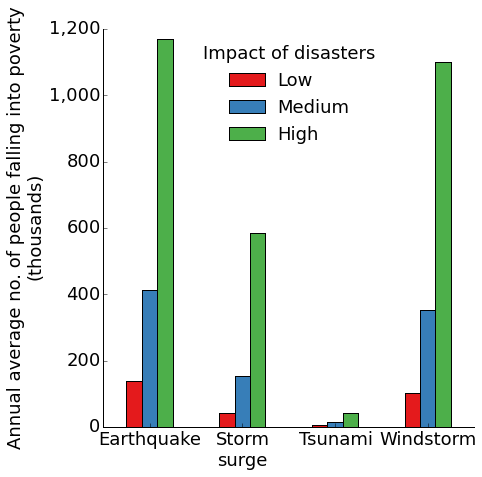

In [44]:
font = {'family' : 'sans serif',
    'size'   : 18}
plt.rc('font', **font)

fig1 = plt.figure(figsize=(7,7))
ax = fig1.add_subplot(111)
gg = totals.unstack("disasters_cursor")
gg.columns=(["Low","Medium","High"])
gg.columns.name="Impact of disasters"
to_plot = 10**(-3)*gg.loc[['earthquake','surge','tsunami','wind']]
my_colors = list(islice(cycle(['#e41a1c','#377eb8','#4daf4a']), None, len(to_plot)))

to_plot.plot(kind='bar',rot=0,ax=ax,color=my_colors)
ax.legend(frameon=False,loc=0,title="Impact of disasters",prop=font)
plt.ylabel("Annual average no. of people falling into poverty\n(thousands)")
plt.xlabel("")
labels = [item.get_text().title() for item in ax.get_xticklabels()]
labels[1] = "Storm\nsurge"
labels[3] = "Windstorm"
ax.set_xticklabels(labels)
spine_and_ticks(ax)
y_thousands_sep(ax)
#savefig("results_other_disasters_newdf_with_reconstruction.png",bbox_inches="tight",dpi=300)

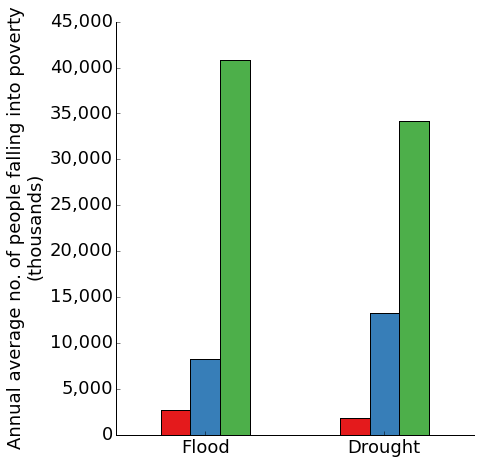

In [45]:
font = {'family' : 'sans serif',
    'size'   : 18}

plt.rc('font', **font)

fig2 = plt.figure(figsize=(7,7))
ax2 = fig2.add_subplot(111)
gg = totals.unstack("disasters_cursor")
gg.columns=(["Low","Medium","High"])
gg.columns.name="Impact of disasters"
to_plot2 = 10**(-3)*gg.loc[['floodglofris','drought']]
my_colors = ['#e41a1c','#377eb8','#4daf4a','#e41a1c','#377eb8','#4daf4a']

to_plot2.plot(kind='bar',rot=0,ax=ax2,color=my_colors,legend=False)
#ax2.legend(frameon=False,loc=2,title="Disasters impact",prop=font)
plt.ylabel("Annual average no. of people falling into poverty\n(thousands)")
plt.xlabel("")
labels = [item.get_text().title() for item in ax2.get_xticklabels()]
labels[0]='Flood'
ax2.set_xticklabels(labels)
spine_and_ticks(ax2)
y_thousands_sep(ax2)
#savefig("results_drought_floods_with_reconstruction.png",bbox_inches="tight",dpi=300)

In [46]:
10**(-6)*by_impact[['floodglofris', 'drought']].sum(axis=1)

disasters_cursor
0.0     4.464303
0.5    21.491038
1.0    74.972929
dtype: float64

In [47]:
10**(-6)*by_impact[['earthquake', 'surge','tsunami', 'wind']].sum(axis=1)

disasters_cursor
0.0    0.285572
0.5    0.930569
1.0    2.897254
dtype: float64

In [48]:
by_impact[['earthquake', 'surge','tsunami', 'wind','floodglofris', 'drought']].sum(axis=1)*10**(-6)

disasters_cursor
0.0     4.749875
0.5    22.421607
1.0    77.870184
dtype: float64

In [27]:
df.reset_index().ix[(all_results.hazard_name=='earthquake')&(all_results.rp==1000)&\
               (all_results.disasters_cursor==1),"avoided_poor_time"].sum()*10**(-6)

152.03994882126307

In [28]:
tad = hop.stack('rp').unstack('var')['avoided_poor_time'].reset_index().copy()

In [29]:
tad = tad.ix[tad.disasters_cursor==0.5,:].drop("disasters_cursor",axis=1)

In [30]:
tok = tad.set_index(["hazard_name","rp","countrycode"]).unstack("hazard_name").sum(level="rp")

In [31]:
tok = 10**(-3)*tok.avoided_poor_time

In [34]:
tok*10**(-3)

hazard_name,drought,earthquake,flood,floodglofris,surge,tsunami,wind
rp,,,,,,,
0.1,NaN,0.002415,NaN,NaN,0.000000,NaN,0.000000
0.5,NaN,0.041414,NaN,NaN,0.049391,0.000000e+00,0.004857
1.0,NaN,0.032798,NaN,NaN,0.021585,0.000000e+00,0.011185
1.5,NaN,0.050925,0.107949,NaN,0.030125,6.641711e-08,0.029988
2.0,NaN,0.069585,0.108444,NaN,0.039313,3.487943e-06,0.052691
3.0,NaN,0.109580,0.456151,NaN,0.055340,2.589850e-05,0.091388
5.0,3.589452,0.184840,1.415311,18.754298,0.160337,1.409871e-04,0.201584
10.0,3.589452,0.761657,7.465316,39.923169,0.488012,1.410570e-03,1.214433
20.0,3.589452,1.525789,14.090540,39.923169,0.707938,4.944937e-03,4.556880


In [59]:
tok.index

Float64Index([    0.1,     0.5,     1.0,     1.5,     2.0,     3.0,     5.0,
                 10.0,    20.0,    25.0,    50.0,   100.0,   250.0,   500.0,
               1000.0,  1500.0,  2000.0,  4000.0,  5000.0, 30000.0],
             dtype='float64', name='rp')

In [43]:
tok["proba"] = [1/r for r in tok.index]

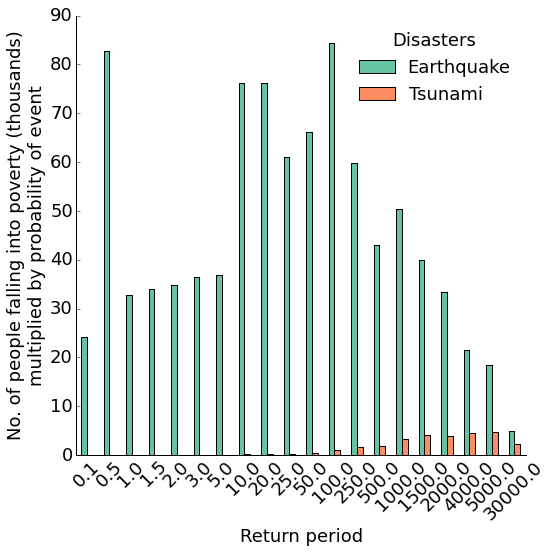

In [70]:
font = {'family' : 'sans serif',
    'size'   : 18}
plt.rc('font', **font)

fig3 = plt.figure(figsize=(8,8))
ax3 = fig3.add_subplot(111)
to_plot3 = tok[['earthquake','tsunami']].multiply(tok['proba'], axis="index").copy()
to_plot3.columns=([i.title() for i in to_plot3.columns])
to_plot3.columns.name="Disasters"
my_colors = ['#66c2a5','#fc8d62']

to_plot3.plot(ax=ax3,color=my_colors,kind='bar',rot=45)
plt.ylabel("No. of people falling into poverty (thousands)\nmultiplied by probability of event")
plt.xlabel("Return period")

ax3.legend(frameon=False,loc=1,title="Disasters",prop=font)
spine_and_ticks(ax3)
y_thousands_sep(ax3)
savefig("quake_tsunami_rp_proba_nov4.png",bbox_inches="tight",dpi=300)

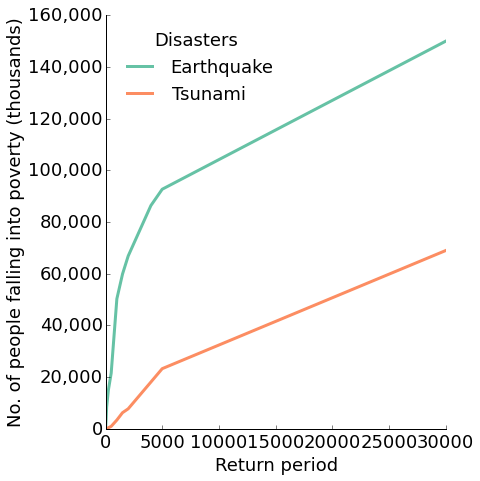

In [71]:
font = {'family' : 'sans serif',
    'size'   : 18}
plt.rc('font', **font)

fig3 = plt.figure(figsize=(7,7))
ax3 = fig3.add_subplot(111)
to_plot3 = tok[['earthquake','tsunami']].dropna()
to_plot3.columns=([i.title() for i in to_plot3.columns])
to_plot3.columns.name="Disasters"
my_colors = ['#66c2a5','#fc8d62']

to_plot3.plot(ax=ax3,color=my_colors,linewidth=3)
plt.ylabel("No. of people falling into poverty (thousands)")
plt.xlabel("Return period")

ax3.legend(frameon=False,loc=2,title="Disasters",prop=font)
spine_and_ticks(ax3)
y_thousands_sep(ax3)
savefig("quake_tsunami_rp_0917.png",bbox_inches="tight",dpi=300)

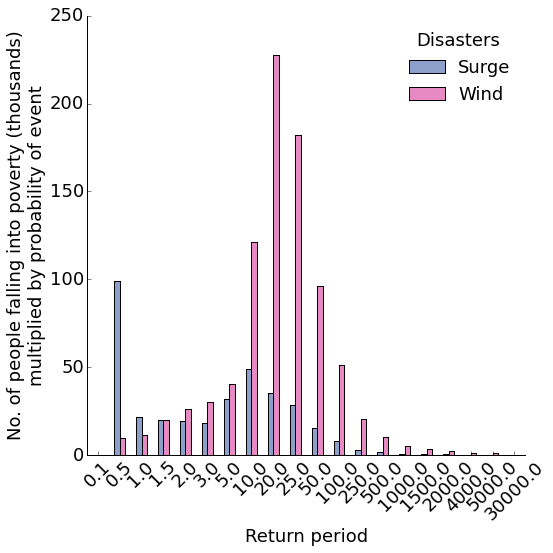

In [73]:
font = {'family' : 'sans serif',
    'size'   : 18}
plt.rc('font', **font)

fig3 = plt.figure(figsize=(8,8))
ax3 = fig3.add_subplot(111)
to_plot3 = tok[['surge','wind']].multiply(tok['proba'], axis="index").copy()
to_plot3.columns=([i.title() for i in to_plot3.columns])
to_plot3.columns.name="Disasters"
my_colors = ['#8da0cb','#e78ac3']

to_plot3.plot(ax=ax3,color=my_colors,kind='bar',rot=45)
plt.ylabel("No. of people falling into poverty (thousands)\nmultiplied by probability of event")
plt.xlabel("Return period")

ax3.legend(frameon=False,loc=1,title="Disasters",prop=font)
spine_and_ticks(ax3)
y_thousands_sep(ax3)
savefig("surge_wind_rp_proba_nov4.png",bbox_inches="tight",dpi=300)

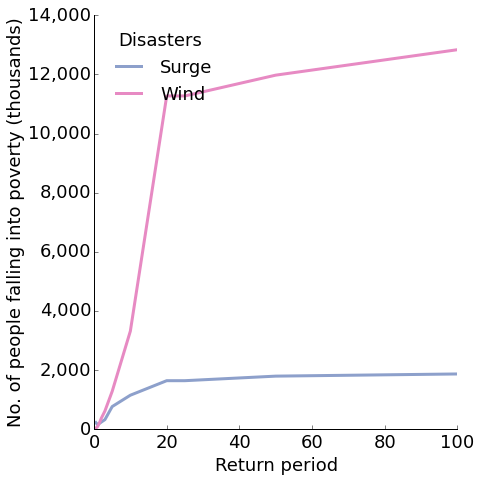

In [395]:
font = {'family' : 'sans serif',
    'size'   : 18}
plt.rc('font', **font)

fig3 = plt.figure(figsize=(7,7))
ax3 = fig3.add_subplot(111)
to_plot3 = tok[['surge','wind']].replace(0,np.nan).dropna()
to_plot3.columns=([i.title() for i in to_plot3.columns])
to_plot3.columns.name="Disasters"
my_colors = ['#8da0cb','#e78ac3']

to_plot3.plot(ax=ax3,color=my_colors,linewidth=3)
plt.ylabel("No. of people falling into poverty (thousands)")
plt.xlabel("Return period")

ax3.legend(frameon=False,loc=2,title="Disasters",prop=font)
spine_and_ticks(ax3)
y_thousands_sep(ax3)

plt.xlim([0,100])
savefig("surge_wind_rp_0917.png",bbox_inches="tight",dpi=300)

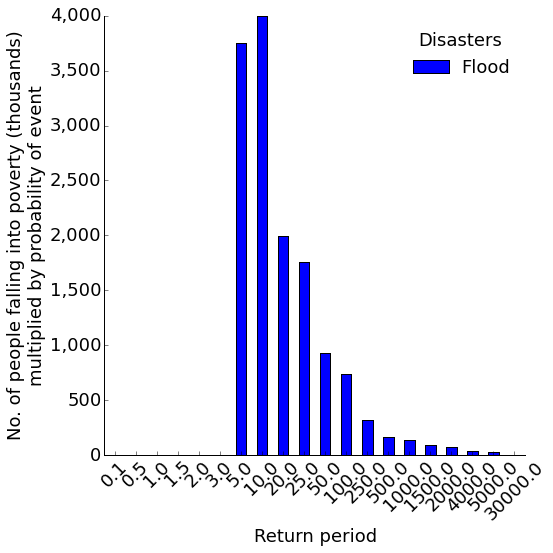

In [78]:
font = {'family' : 'sans serif',
    'size'   : 18}
plt.rc('font', **font)

fig3 = plt.figure(figsize=(8,8))
ax3 = fig3.add_subplot(111)
to_plot3 = tok[['floodglofris']].multiply(tok['proba'], axis="index").copy()
to_plot3.columns=(["Flood"])
to_plot3.columns.name="Disasters"

to_plot3.plot(ax=ax3,color="blue",kind='bar',rot=45)
plt.ylabel("No. of people falling into poverty (thousands)\nmultiplied by probability of event")
plt.xlabel("Return period")

ax3.legend(frameon=False,loc=1,title="Disasters",prop=font)
spine_and_ticks(ax3)
y_thousands_sep(ax3)
savefig("flood_rp_proba_nov4.png",bbox_inches="tight",dpi=300)

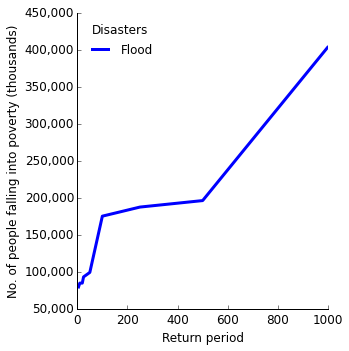

In [397]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

fig4 = plt.figure(figsize=(5,5))
ax4 = fig4.add_subplot(111)
to_plot4 = tok[['floodglofris']].dropna()
to_plot4.columns=(["Flood"])
to_plot4.columns.name="Disasters"
my_colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']

to_plot4.plot(ax=ax4,color="blue",linewidth=3)
plt.ylabel("No. of people falling into poverty (thousands)")
plt.xlabel("Return period")

ax4.legend(frameon=False,loc=2,title="Disasters",prop=font)
spine_and_ticks(ax4)
y_thousands_sep(ax4)
plt.xlim([0,1000])
savefig("flood_rp_0917.png",bbox_inches="tight",dpi=300)

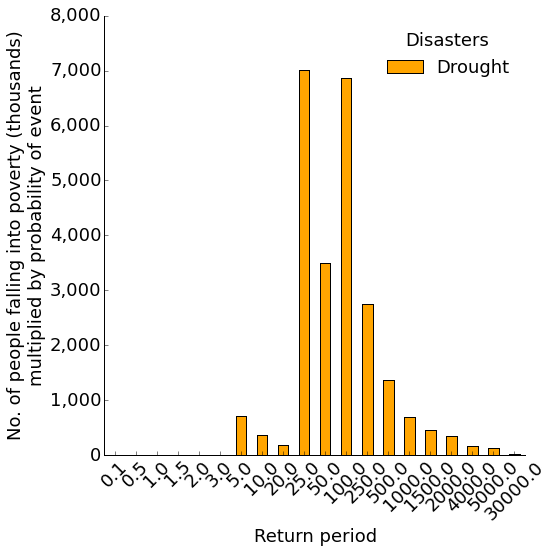

In [77]:
font = {'family' : 'sans serif',
    'size'   : 18}
plt.rc('font', **font)

fig3 = plt.figure(figsize=(8,8))
ax3 = fig3.add_subplot(111)
to_plot3 = tok[['drought']].multiply(tok['proba'], axis="index").copy()
to_plot3.columns=(["Drought"])
to_plot3.columns.name="Disasters"

to_plot3.plot(ax=ax3,color="orange",kind='bar',rot=45)
plt.ylabel("No. of people falling into poverty (thousands)\nmultiplied by probability of event")
plt.xlabel("Return period")

ax3.legend(frameon=False,loc=1,title="Disasters",prop=font)
spine_and_ticks(ax3)
y_thousands_sep(ax3)
savefig("drought_rp_proba_nov4.png",bbox_inches="tight",dpi=300)

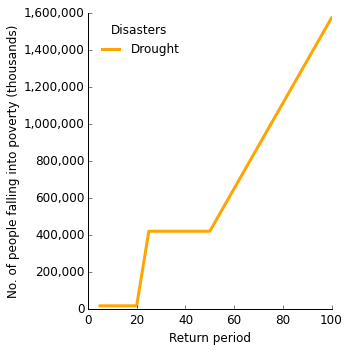

In [401]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

fig4 = plt.figure(figsize=(5,5))
ax4 = fig4.add_subplot(111)
to_plot4 = tok[['drought']].dropna()
to_plot4.columns=(["Drought"])
to_plot4.columns.name="Disasters"
my_colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']

to_plot4.plot(ax=ax4,color="orange",linewidth=3)
plt.ylabel("No. of people falling into poverty (thousands)")
plt.xlabel("Return period")

ax4.legend(frameon=False,loc=2,title="Disasters",prop=font)
spine_and_ticks(ax4)
y_thousands_sep(ax4)
plt.xlim([0,100])
savefig("drought_rp_0917.png",bbox_inches="tight",dpi=300)